# Abdolazizsalimi980292626Ex5

## CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 32x32 colour images divided into 10 classes, with 6,000 images per class. The dataset is further divided into training and test sets, with 50,000 training images and 10,000 test images.




### Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### Training and Test Batches

The dataset is organized into five training batches and one test batch, each containing 10,000 images. The test batch comprises 1,000 randomly-selected images from each class, resulting in a total of 10,000 test images. 

In contrast, the training batches contain the remaining images and are organized in random order. It is important to note that some training batches may have an uneven distribution of images across classes, with more images from one class than another. However, collectively, the training batches contain exactly 5,000 images from each class.

This division allows researchers and practitioners to train machine learning models on the training set and evaluate their performance on the test set, providing a standardized benchmark for image classification tasks.



### Importing Necessary Libraries:

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Activation ,Flatten
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
batch_size = 100  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 50

### Load the data

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


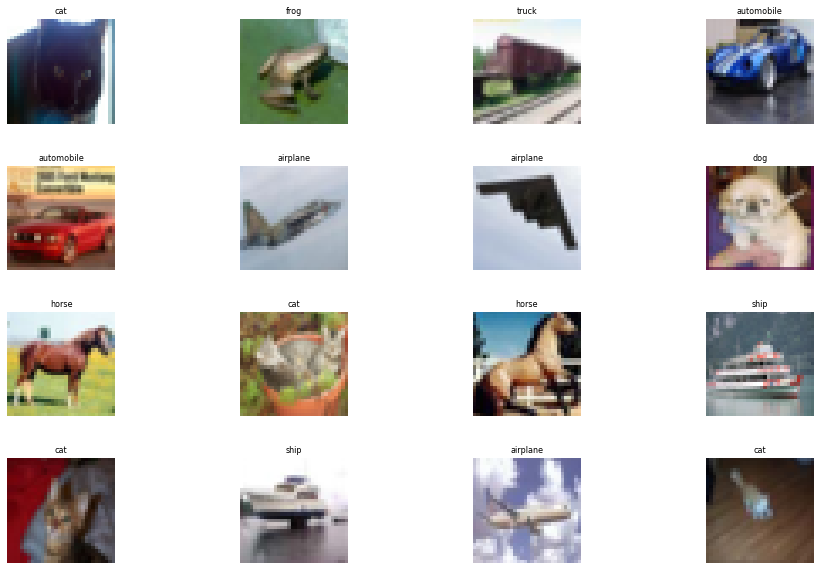

In [49]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4



fig, axes = plt.subplots(L_grid, W_grid, figsize = (16 ,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [50]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


c:\Users\Parseh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Parseh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


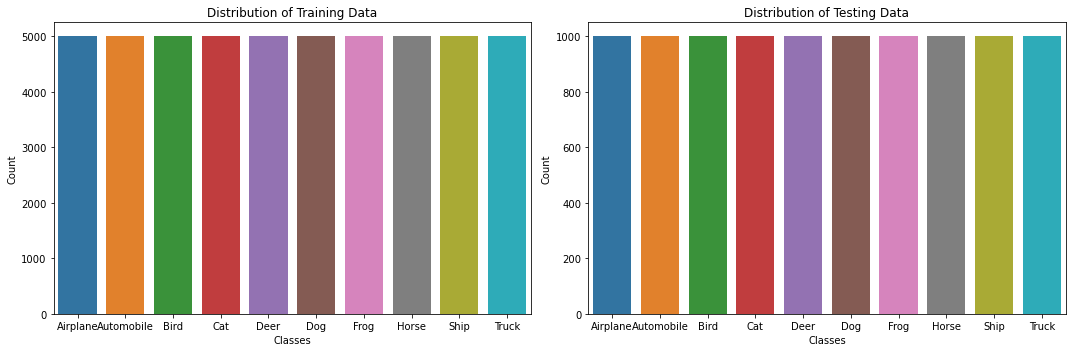

In [51]:

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training Data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(classes_name)

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing Data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(classes_name)

plt.tight_layout()
plt.show()


### Pre-Processing The Data:

In [52]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Designing The  Neural Network:

In [53]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout

model = Sequential()

model.add(Flatten(input_shape=X_train.shape[1:]))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [54]:

# uncomment this if you want display  model summery 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               1573376   
                                                                 
 activation_15 (Activation)  (None, 512)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                      

In [55]:
model.save('model.h5')


## Model Architecture

The model architecture used is a Sequential model, which is a linear stack of layers. The details of the layers in the model are as follows:
| Layer (type)            | Output Shape    | Param #  |
|-------------------------|-----------------|----------|
| flatten_1 (Flatten)     | (None, 3072)    | 0        |
| dense_1 (Dense)         | (None, 512)     | 1573376  |
| activation_1 (Activation) | (None, 512)   | 0        |
| batch_normalization_1 (BatchNormalization) | (None, 512) | 2048 |
| dropout_1 (Dropout)     | (None, 512)     | 0        |
| dense_2 (Dense)         | (None, 256)     | 131328   |
| activation_2 (Activation) | (None, 256)   | 0        |
| batch_normalization_2 (BatchNormalization) | (None, 256) | 1024 |
| dropout_2 (Dropout)     | (None, 256)     | 0        |
| dense_3 (Dense)         | (None, 128)     | 32896    |
| activation_3 (Activation) | (None, 128)   | 0        |
| batch_normalization_3 (BatchNormalization) | (None, 128) | 512 |
| dropout_3 (Dropout)     | (None, 128)     | 0        |
| dense_4 (Dense)         | (None, 64)      | 8256     |
| activation_4 (Activation) | (None, 64)    | 0        |
| batch_normalization_4 (BatchNormalization) | (None, 64) | 256  |
| dropout_4 (Dropout)     | (None, 64)      | 0        |
| dense_5 (Dense)         | (None, 32)      | 2080     |
| activation_5 (Activation) | (None, 32)    | 0        |
| batch_normalization_5 (BatchNormalization) | (None, 32) | 128  |
| dropout_5 (Dropout)     | (None, 32)      | 0        |
| dense_6 (Dense)         | (None, 16)      | 528      |
| activation_6 (Activation) | (None, 16)    | 0        |
| batch_normalization_6 (BatchNormalization) | (None, 16) | 64   |
| dropout_6 (Dropout)     | (None, 16)      | 0        |
| dense_7 (Dense)         | (None, 10)      | 170      |
| activation_7 (Activation) | (None, 10)    | 0        |


![NN Demo ](nn.svg)


![NN H](nnH.png)


![NN V](nnV.png)


In [56]:
# uncomment to install keras visual model library 
# !pip install visualkeras


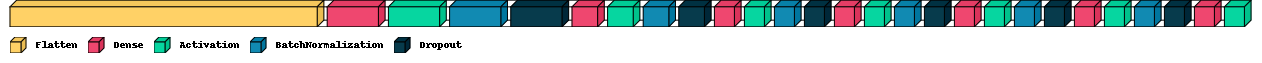

In [57]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [58]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

# Normalizing the input image
import numpy as np

# Compute mean and standard deviation of the training set
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

# Standardize the data
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
500/500 [==============================] - 8s 14ms/step - loss: 2.4142 - accuracy: 0.1567 - val_loss: 1.9681 - val_accuracy: 0.2825
Epoch 2/50
500/500 [==============================] - 7s 13ms/step - loss: 2.0514 - accuracy: 0.2310 - val_loss: 1.8443 - val_accuracy: 0.3238
Epoch 3/50
500/500 [==============================] - 6s 13ms/step - loss: 1.9449 - accuracy: 0.2678 - val_loss: 1.7670 - val_accuracy: 0.3527
Epoch 4/50
500/500 [==============================] - 7s 13ms/step - loss: 1.8851 - accuracy: 0.2944 - val_loss: 1.7143 - val_accuracy: 0.3627
Epoch 5/50
500/500 [==============================] - 7s 13ms/step - loss: 1.8445 - accuracy: 0.3181 - val_loss: 1.6585 - val_accuracy: 0.4059
Epoch 6/50
500/500 [==============================] - 6s 13ms/step - loss: 1.8047 - accuracy: 0.3403 - val_loss: 1.6335 - val_accuracy: 0.4071
Epoch 7/50
500/500 [==============================] - 7s 13ms/step - loss: 1.7668 - accuracy: 0.3558 - val_loss: 1.5968 - val_accuracy: 0.4307

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


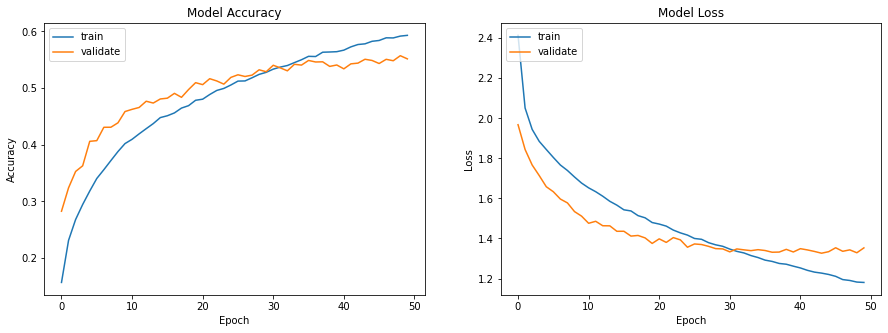

In [59]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [60]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3531 - accuracy: 0.5515
Test loss: 1.353149175643921
Test accuracy: 0.5515000224113464


<AxesSubplot:>

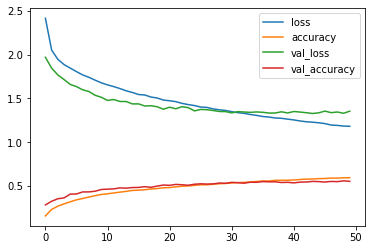

In [61]:
pd.DataFrame(history.history).plot()

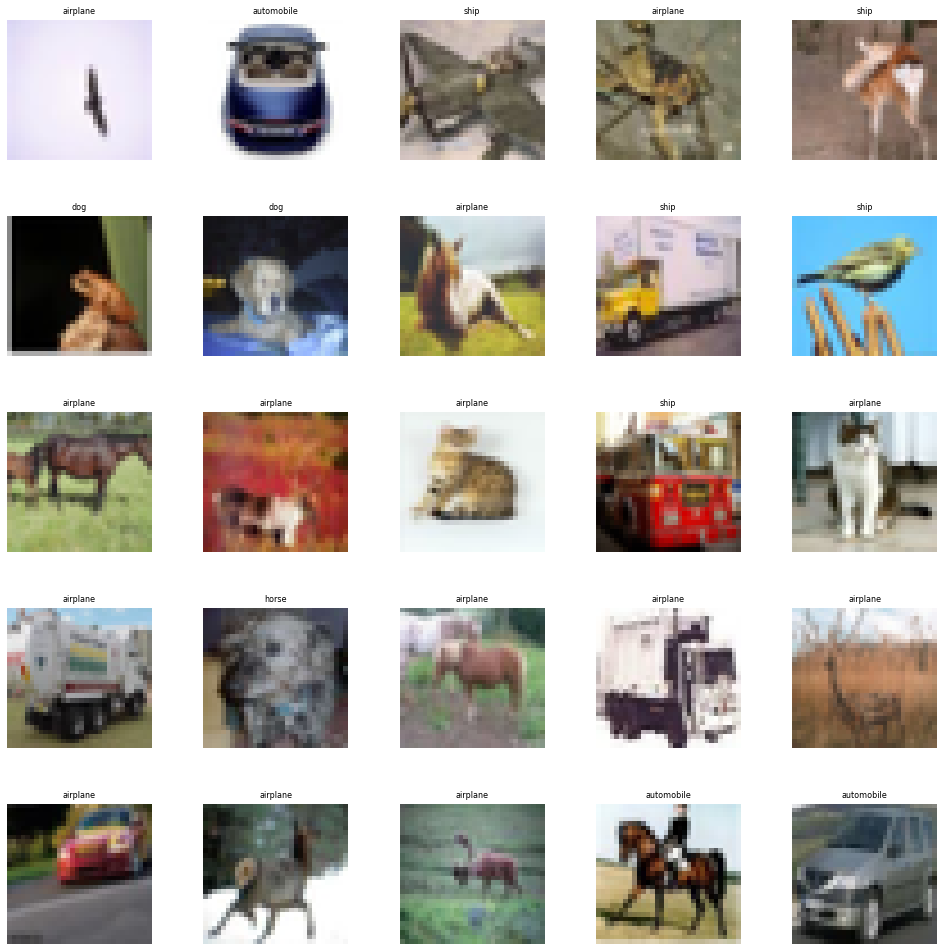

In [64]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']


W_grid = 5
L_grid = 5


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)